# Campaign for selling personal loans.
This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.
The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

1. Read the column description and ensure you understand each attribute well 
2. Study the data distribution in each attribute, share your findings. (5 points)
3. Get the target column distribution. Your comments 
4. Split the data into training and test set in the ratio of 70:30 respectively 
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)
6. Print the confusion matrix for all the above models (5 points)
7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)


# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Import and Read Dataset

In [2]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
df.head(20)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [4]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
df.shape

(5000, 14)

In [6]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

# 3. Understanding Data

## a. Descriptive Statistics

In [7]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.00,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000
mean,2500.50,45.338,20.105,73.774,93152.503,2.396,1.938,1.881,56.499,0.096,0.104,0.060,0.597,0.294
std,1443.52,11.463,11.468,46.034,2121.852,1.148,1.748,0.840,101.714,0.295,0.306,0.238,0.491,0.456
min,1.00,23.000,-3.000,8.000,9307.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1250.75,35.000,10.000,39.000,91911.000,1.000,0.700,1.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,2500.50,45.000,20.000,64.000,93437.000,2.000,1.500,2.000,0.000,0.000,0.000,0.000,1.000,0.000
75%,3750.25,55.000,30.000,98.000,94608.000,3.000,2.500,3.000,101.000,0.000,0.000,0.000,1.000,1.000
max,5000.00,67.000,43.000,224.000,96651.000,4.000,10.000,3.000,635.000,1.000,1.000,1.000,1.000,1.000


**Some Idea on Data:**
    From the above methods, we could see we have 14 features ( 1-dependent and 13-Independent)
    All columns are Integer/Floats, so our data is good as of now for our statistical analysis and building classification models.
    ID column can easily be removed as it is just indentity of users and not going to contribute to our statistical analysis and classification models
    We are not seeing outliers in many of the attributes as mean is very close to the Median value.
    But Outliers are in Mortgage attribute.
    Experience shows minimium as neagtive value, it is not possible to have negative experience, so we need to handle that.

**Categorical Data:**
    Personal Loan(This is our target variable),  Securities Account,CD Account, Online, CreditCard, Family, Education,  Zip Code
    
**Continuous Data**
    Age, Experience, Income, CCAvg, Mortgage
    

## b. Missing Value ##

In [8]:
df.apply(lambda x : sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
df.apply(lambda x : sum(x.isna()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**Observation:**

    As per above, there is no null values in our dataset

## c. Univariate Analysis ##

In [10]:
import seaborn as sns

C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


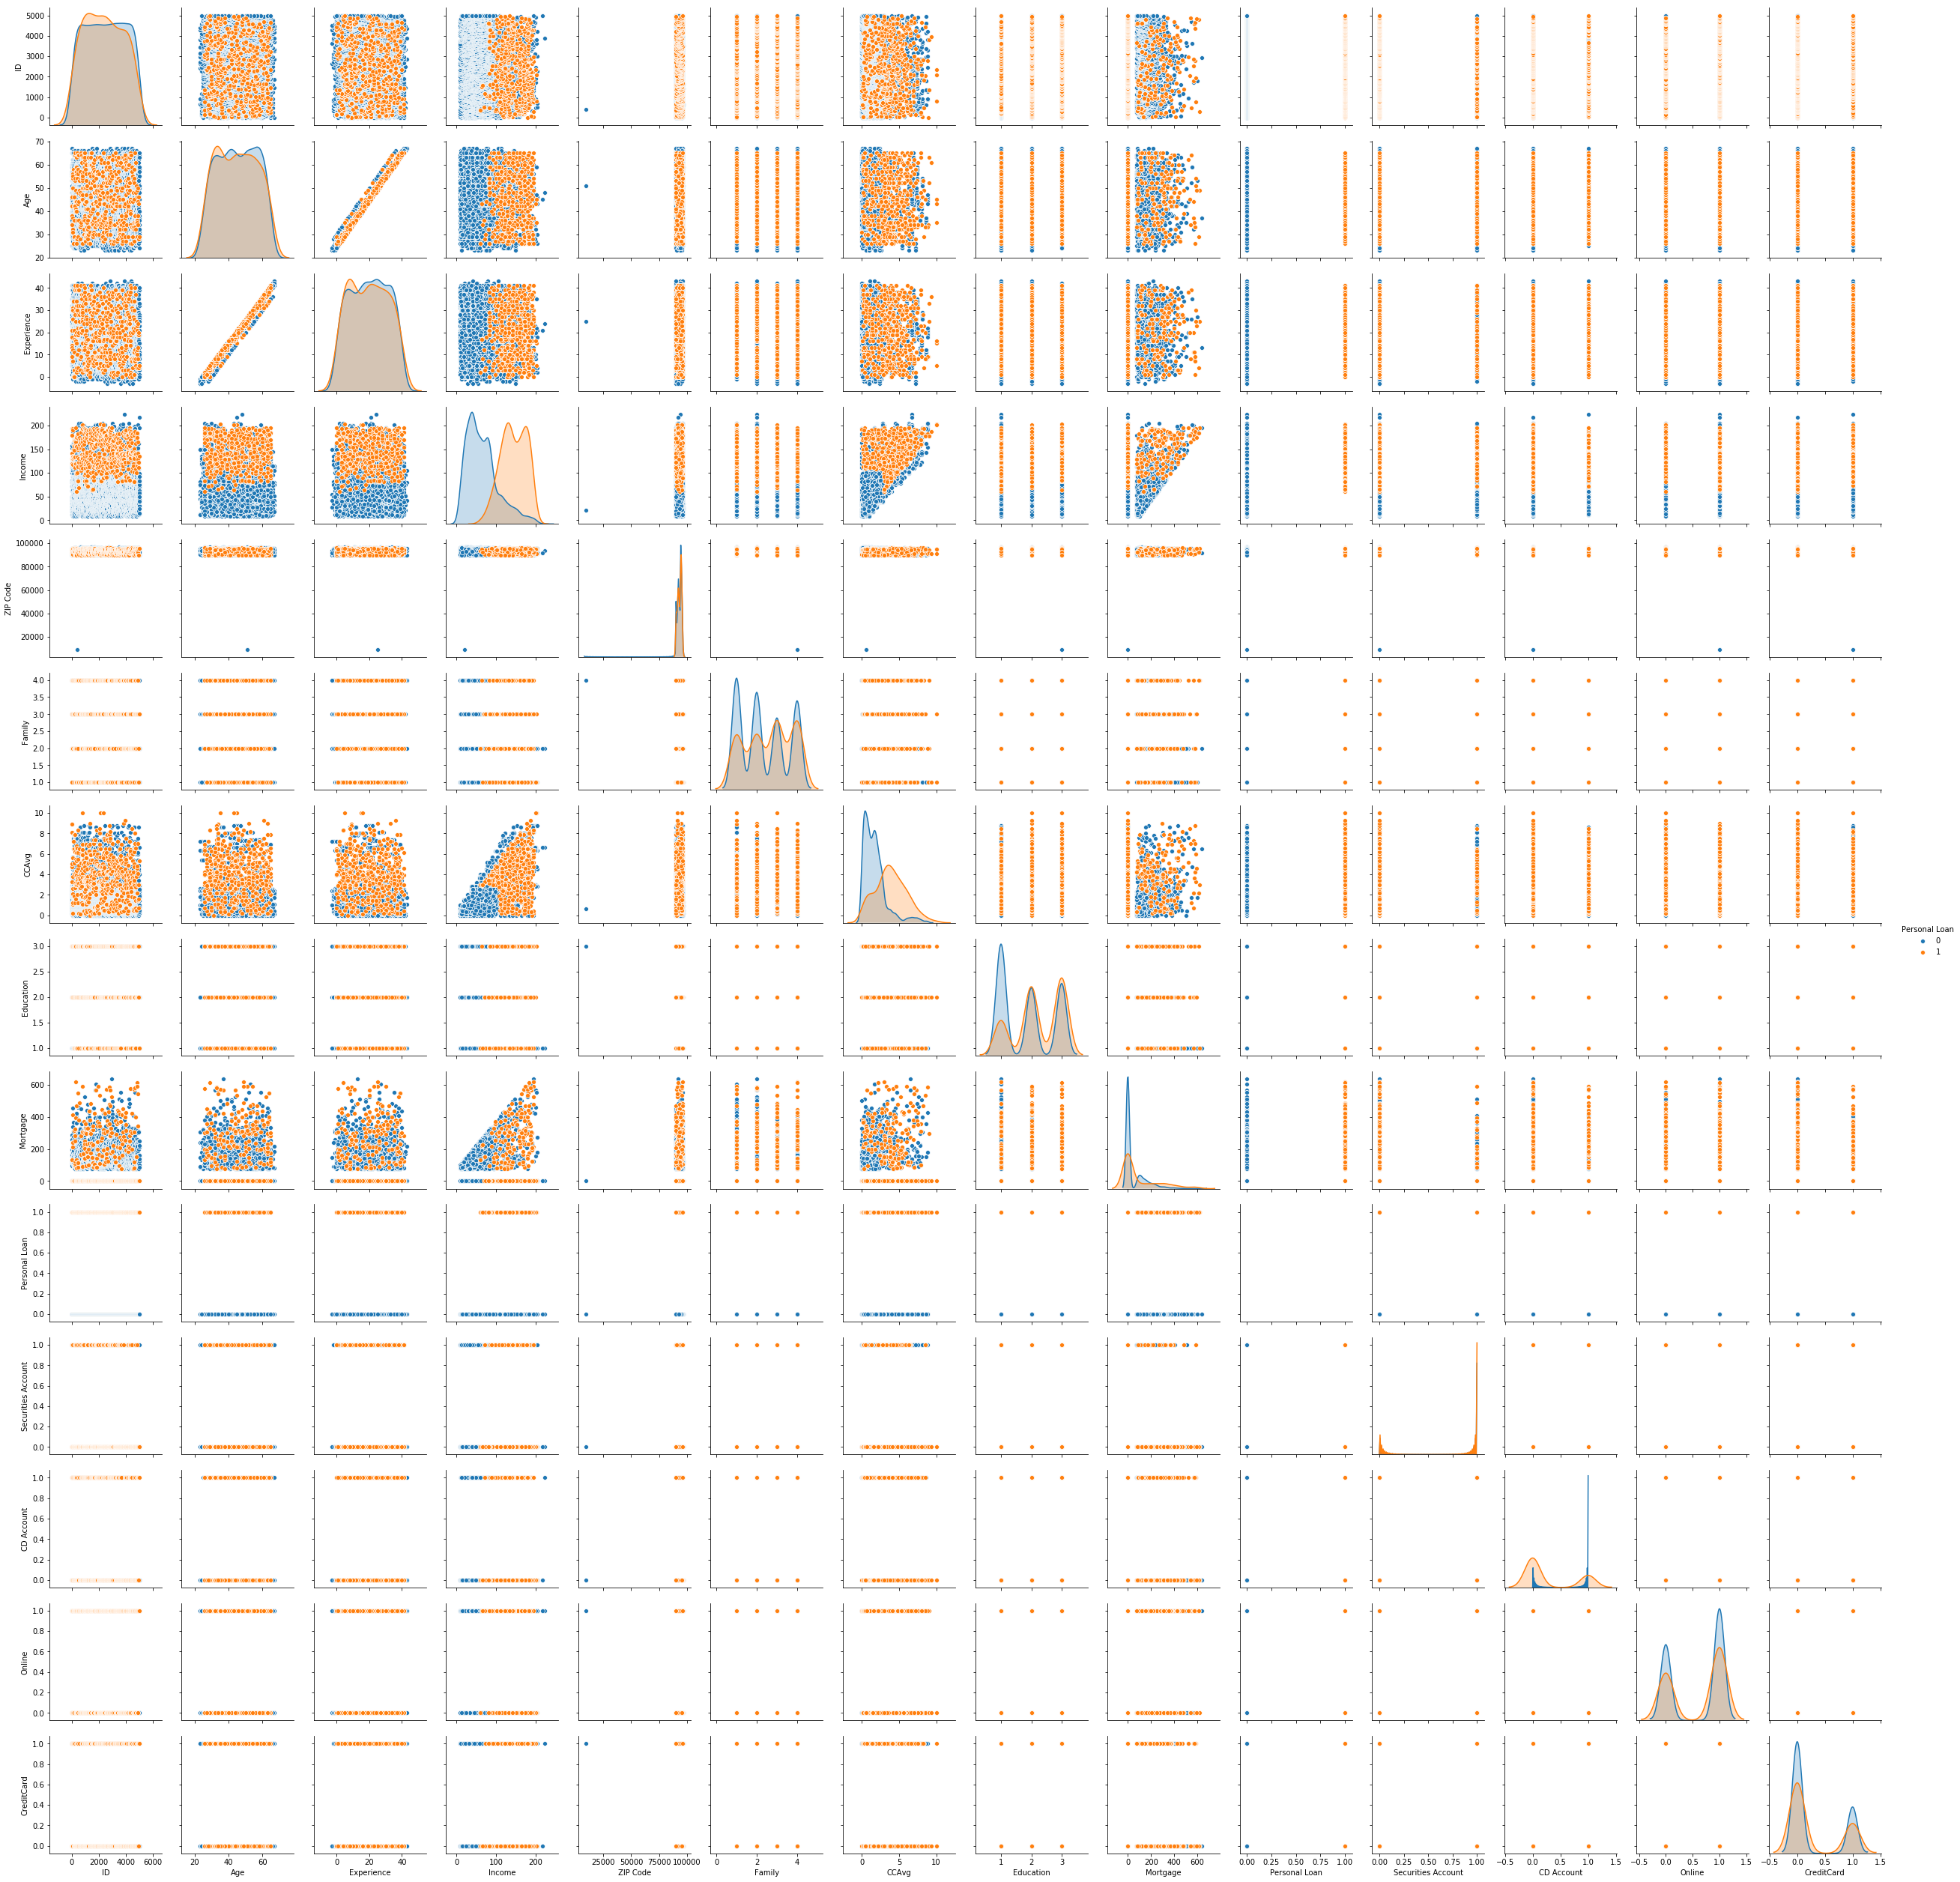

In [11]:
sns.pairplot(df,hue='Personal Loan', diag_kind = 'kde' )

**Observations**

ID column is not going to contribute to the our predictions as it is just identity of the users and is unique for each user.
from the above pairplot visualization, below is my inference

1. Age and Experience data is normally distributed, but we could also see the our dependent attribute(Personal Loan) categories is overlapping on the attribute,
Hence it is not good attribute to include in our classification model

2. Income is positively skewed.
3. CCAvg is also a positively skewed variable
4. Mortgage is having outliers
5. From the above visualization, we could see that Attribute 'Income' and 'CCAvg' is separating the target attribute very clearly, both seems to be good attribute for our classification model.
   Other Attributes data is distributed evenly on the target attribute.

## d. Handling negative values in Experience feature##

In [12]:
df[df['Experience'] < 0]['Experience'].count()

52

Total 52 rows out of 5000 rows in Experience feature is having negative values, which is approximately 1% of data.
We will think about this later on how to handle this.
        Also based on above pairplot visualization, we could see Age is directly proportional to Experience.
        Let's take Age and Experience column and analyse.

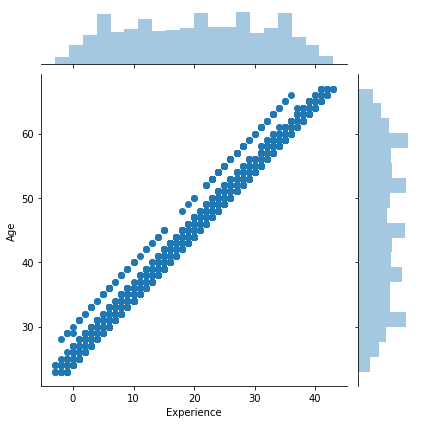

In [13]:
sns.jointplot('Experience','Age',df)

**Observation**

    We could see here people having Age less than 30 are having negative experiences
    I would impute the median of the experience, whose experience is less than 30

In [14]:
df[df['Age'] < 30]['Experience'].median()

2.0

In [15]:
PosExp = df.loc[df['Experience'] >0]
df_filtered = PosExp[(PosExp.Age < 30)]
experience = df_filtered['Experience'].median()

NegExp = df.Experience < 0
NegExp_list = df.loc[NegExp]['ID'].tolist()
for id in NegExp_list:
    df.loc[df.loc[np.where(df['ID']==id)].index, 'Experience'] = experience


In [16]:
df[df['Experience'] < 0]['Experience'].count()

0

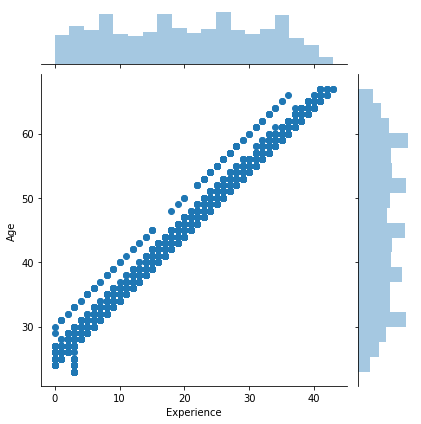

In [17]:
sns.jointplot('Experience','Age',df)

**We can see negative experience data is handled now**

## e. 2 feature data effect on Target variable ##

In [18]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [19]:
def effect_2ftrontarget(x,y,target,data):
    return sns.boxplot(x,y,target,data)

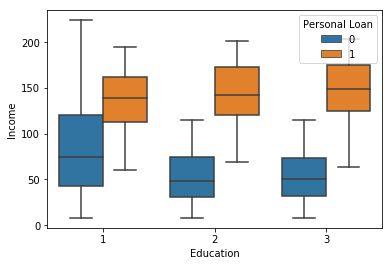

In [20]:
effect_2ftrontarget('Education','Income','Personal Loan',df)

From the above boxplot, we could see Income is higher for Education 1, but Personal is taken by all Education groups.

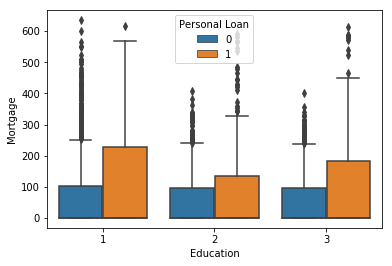

In [21]:
effect_2ftrontarget('Education','Mortgage','Personal Loan',df)

From this we could again see Outliers in Mortgage

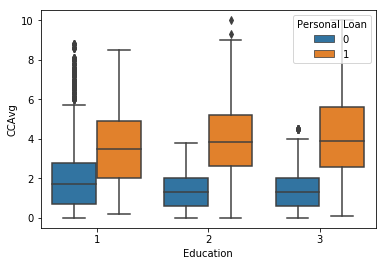

In [22]:
#Age, Experience, Income, CCAvg, Mortgage
effect_2ftrontarget('Education','CCAvg','Personal Loan',df)

## f. Categorical Column Analysis

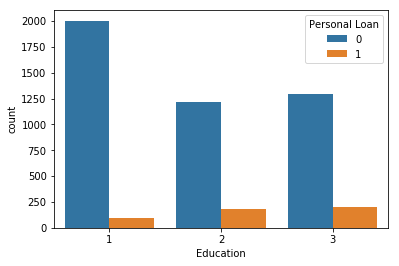

In [23]:
sns.countplot(x="Education", data=df,hue="Personal Loan")

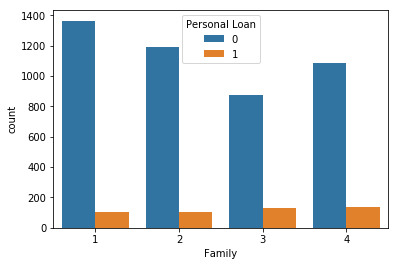

In [24]:
sns.countplot(x="Family", data=df,hue="Personal Loan")

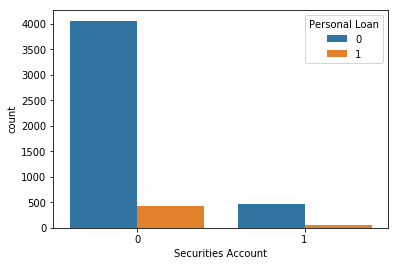

In [25]:
sns.countplot(x="Securities Account", data=df,hue="Personal Loan")

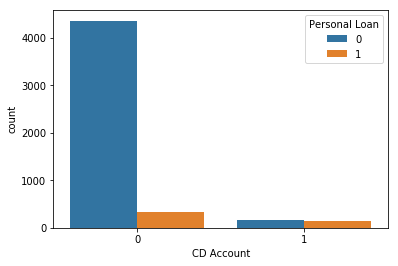

In [26]:
sns.countplot(x="CD Account", data=df,hue="Personal Loan")

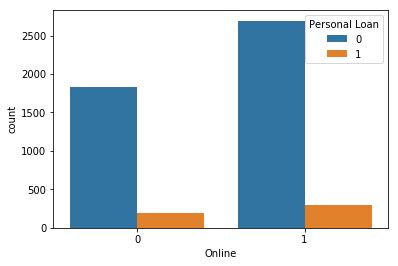

In [27]:
sns.countplot(x="Online", data=df,hue="Personal Loan")

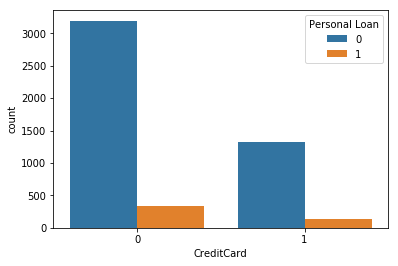

In [28]:
sns.countplot(x="CreditCard", data=df,hue="Personal Loan")

**Observations**


    Majority of customers who does not have personal loan have securities account.
    
    Majority of Customers who does not have CD account , does not have  personal loan.
    
    Majority of Customers who has credit card, doesn't have personal loan.

## f. Correlation

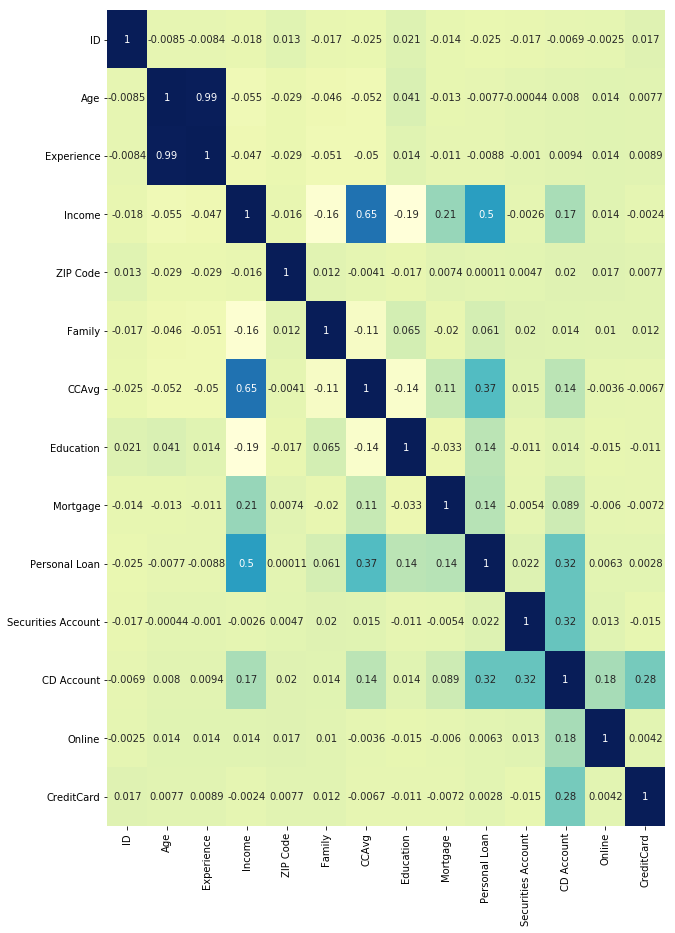

In [29]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,15))
sns.heatmap(corr, annot=True, cbar=False,cmap="YlGnBu")

**Observations**

From above correlation analysis, our observations are as below:

Income and CCAvg is moderately correlated.

Age and Experience is highly correlated

# 3. Building Models

## a. splitting into train and test

In [30]:
X = df.drop(['ID','Personal Loan'], axis=1)
y = df['Personal Loan']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25 , random_state=402)

## b. Importing model libraries

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,accuracy_score, classification_report

## F. feeding our data directly into Models without any parameters

In [34]:
def Model_Scores(model,trainX,trainy,testX, testy):
    model.fit(trainX, trainy)
    y_predict = model.predict(testX)
    print("Precision Score:",precision_score(testy, y_predict))
    print("Recall Score:",recall_score(testy, y_predict))
    print("f1_score:",f1_score(testy, y_predict))
    print("Accuracy Score:",accuracy_score(testy, y_predict))
    print(confusion_matrix(testy, y_predict))
    print(classification_report(testy, y_predict))

In [35]:
Model_Scores(LogisticRegression(),X_train, y_train, X_test, y_test)

Precision Score: 0.4358974358974359
Recall Score: 0.3238095238095238
f1_score: 0.37158469945355194
Accuracy Score: 0.908
[[1101   44]
 [  71   34]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1145
           1       0.44      0.32      0.37       105

   micro avg       0.91      0.91      0.91      1250
   macro avg       0.69      0.64      0.66      1250
weighted avg       0.90      0.91      0.90      1250



C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
Model_Scores(GaussianNB(),X_train, y_train, X_test, y_test)

Precision Score: 0.40764331210191085
Recall Score: 0.6095238095238096
f1_score: 0.4885496183206108
Accuracy Score: 0.8928
[[1052   93]
 [  41   64]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1145
           1       0.41      0.61      0.49       105

   micro avg       0.89      0.89      0.89      1250
   macro avg       0.69      0.76      0.71      1250
weighted avg       0.92      0.89      0.90      1250



In [37]:
Model_Scores(BernoulliNB(),X_train, y_train, X_test, y_test)

Precision Score: 0.4
Recall Score: 0.11428571428571428
f1_score: 0.17777777777777776
Accuracy Score: 0.9112
[[1127   18]
 [  93   12]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1145
           1       0.40      0.11      0.18       105

   micro avg       0.91      0.91      0.91      1250
   macro avg       0.66      0.55      0.57      1250
weighted avg       0.88      0.91      0.89      1250



In [38]:
Model_Scores(KNeighborsClassifier(),X_train, y_train, X_test, y_test)

Precision Score: 0.42857142857142855
Recall Score: 0.2571428571428571
f1_score: 0.3214285714285714
Accuracy Score: 0.9088
[[1109   36]
 [  78   27]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1145
           1       0.43      0.26      0.32       105

   micro avg       0.91      0.91      0.91      1250
   macro avg       0.68      0.61      0.64      1250
weighted avg       0.89      0.91      0.90      1250



In [39]:
Model_Scores(SVC(),X_train, y_train, X_test, y_test)

C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Precision Score: 0.0
Recall Score: 0.0
f1_score: 0.0
Accuracy Score: 0.916
[[1145    0]
 [ 105    0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1145
           1       0.00      0.00      0.00       105

   micro avg       0.92      0.92      0.92      1250
   macro avg       0.46      0.50      0.48      1250
weighted avg       0.84      0.92      0.88      1250



C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\U

**Observations:**

    By feeding our data directly into models without any parameter tuning, we could see Gaussian Naive Bayes is performing better than other models based on Precision, Recall and F1 Scores.
    Support Vector Classifier performed best in terms of Accuracy Score, but it failed completely based on Precision, Recall and F1 Scores

## g. Feature Selection

From our Correlation Analysis, we could see that Age/Experience are highly correlated and Income/CCAvg is also correlated to each other.
So, we can keep anyone of them from our dataset and can ignore the other one.
We will use Age and Income in our Logistic Model, as those are more correlated to target attribute.

In [40]:
df_ftr = df[['Age','Income','Personal Loan']]

In [41]:
X_ftr = df_ftr.drop(['Personal Loan'], axis=1)
y_ftr = df_ftr['Personal Loan']

In [42]:
X_train_ftr, X_test_ftr, y_train_ftr, y_test_ftr = train_test_split(X_ftr,y_ftr, test_size=0.25 , random_state=402)

In [43]:
Model_Scores(LogisticRegression(),X_train_ftr, y_train_ftr, X_test_ftr, y_test_ftr)

Precision Score: 0.4864864864864865
Recall Score: 0.34285714285714286
f1_score: 0.4022346368715084
Accuracy Score: 0.9144
[[1107   38]
 [  69   36]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1145
           1       0.49      0.34      0.40       105

   micro avg       0.91      0.91      0.91      1250
   macro avg       0.71      0.65      0.68      1250
weighted avg       0.90      0.91      0.91      1250



C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Attached the scores of Logistic regression Model, which implemented using all feature, by looking at that we can see it improved the model very little**

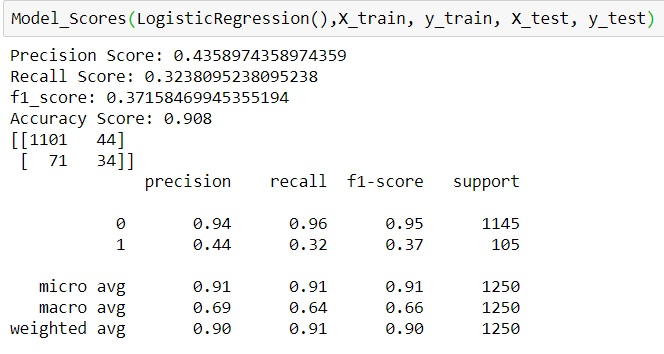

Let's do the same for other Classification models

In [44]:
Model_Scores(GaussianNB(),X_train_ftr, y_train_ftr, X_test_ftr, y_test_ftr)

Precision Score: 0.4491525423728814
Recall Score: 0.5047619047619047
f1_score: 0.47533632286995514
Accuracy Score: 0.9064
[[1080   65]
 [  52   53]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1145
           1       0.45      0.50      0.48       105

   micro avg       0.91      0.91      0.91      1250
   macro avg       0.70      0.72      0.71      1250
weighted avg       0.91      0.91      0.91      1250



**Attached the scores of Gaussian Naive Bayes Model, which implemented using all feature, by looking at that we can see it improved the model very little**

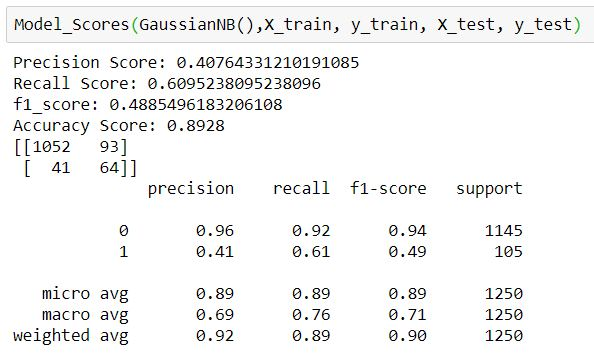

Let's do the same for other Classification models

In [45]:
Model_Scores(BernoulliNB(),X_train_ftr, y_train_ftr, X_test_ftr, y_test_ftr)

Precision Score: 0.0
Recall Score: 0.0
f1_score: 0.0
Accuracy Score: 0.916
[[1145    0]
 [ 105    0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1145
           1       0.00      0.00      0.00       105

   micro avg       0.92      0.92      0.92      1250
   macro avg       0.46      0.50      0.48      1250
weighted avg       0.84      0.92      0.88      1250



C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\U

**Attached the scores of Bernoulli Naive Bayes Model, which implemented using all feature, by looking at that we can see both are poor model**

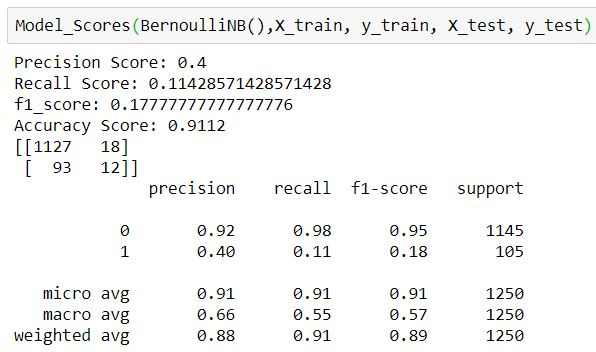

Let's do the same for other Classification models

In [46]:
Model_Scores(KNeighborsClassifier(),X_train_ftr, y_train_ftr, X_test_ftr, y_test_ftr)

Precision Score: 0.4457831325301205
Recall Score: 0.3523809523809524
f1_score: 0.3936170212765957
Accuracy Score: 0.9088
[[1099   46]
 [  68   37]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1145
           1       0.45      0.35      0.39       105

   micro avg       0.91      0.91      0.91      1250
   macro avg       0.69      0.66      0.67      1250
weighted avg       0.90      0.91      0.90      1250



**Attached the scores of K-Nearest Neighbors Model, which implemented using all feature, by looking at that we can see it improved the model very little**

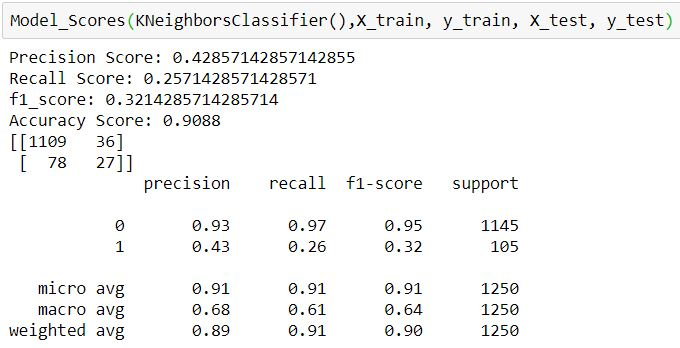

Let's do the same for other Classification models

In [47]:
Model_Scores(SVC(),X_train_ftr, y_train_ftr, X_test_ftr, y_test_ftr)

C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Precision Score: 0.375
Recall Score: 0.11428571428571428
f1_score: 0.17518248175182483
Accuracy Score: 0.9096
[[1125   20]
 [  93   12]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1145
           1       0.38      0.11      0.18       105

   micro avg       0.91      0.91      0.91      1250
   macro avg       0.65      0.55      0.56      1250
weighted avg       0.88      0.91      0.89      1250



**Attached the scores of Support Vector Model, which implemented using all feature, by looking at that we can see it improved very significantly**

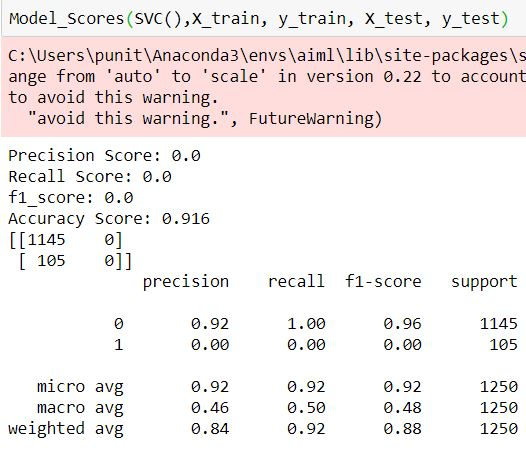


**Observations:**

We could see how feature selection has improved the respective models.

Here, Gaussian Naive Bayes Still is Winner!!


Now let's do hyperparameter Tuning for K Nearest Neighbor Classifier and Support Vector Classifier

## h. Parameter Tuning

### 1. KNN

For KNN we need to be carefully chose K ( nearest neighbors) value.

By Default it takes 5.

Let's see how model performs with different values of k.

In [48]:
knn_model = []
#knn_mod = {'n_neighbors':[], 'Precision':[],'Recall':[],'F1_Scroe':[],'Accuracy':[] }
for k in np.arange(5, 100 ):
    model = KNeighborsClassifier(n_neighbors=k,)
    model.fit(X_train_ftr, y_train_ftr)
    y_predict = model.predict(X_test_ftr)
    p = precision_score(y_test_ftr, y_predict)
    r = recall_score(y_test_ftr, y_predict)
    f = f1_score(y_test_ftr, y_predict)
    a = accuracy_score(y_test_ftr, y_predict)
    knn_mod = {'n_neighbors':k, 'Precision':p,'Recall':r,'F1_Scroe':f,'Accuracy':a }
    knn_model.append(knn_mod)
knn_data = pd.DataFrame(knn_model)

In [49]:
knn_data.head(5)

,Accuracy,F1_Scroe,Precision,Recall,n_neighbors
0,0.909,0.394,0.446,0.352,5
1,0.914,0.344,0.483,0.267,6
2,0.910,0.389,0.450,0.343,7
3,0.914,0.344,0.483,0.267,8
4,0.910,0.391,0.456,0.343,9


In [50]:
knn_data.iloc[knn_data['Precision'].idxmax()]

Accuracy        0.920
F1_Scroe        0.390
Precision       0.542
Recall          0.305
n_neighbors    50.000
Name: 45, dtype: float64

In [51]:
knn_data.iloc[knn_data['Recall'].idxmax()]

Accuracy        0.916
F1_Scroe        0.420
Precision       0.500
Recall          0.362
n_neighbors    93.000
Name: 88, dtype: float64

In [52]:
knn_data.iloc[knn_data['F1_Scroe'].idxmax()]

Accuracy        0.916
F1_Scroe        0.420
Precision       0.500
Recall          0.362
n_neighbors    93.000
Name: 88, dtype: float64

In [53]:
knn_data.iloc[knn_data['Accuracy'].idxmax()]

Accuracy        0.920
F1_Scroe        0.390
Precision       0.542
Recall          0.305
n_neighbors    50.000
Name: 45, dtype: float64

**Observations:**

    Based on Precision and Accuracy, nearest neighbors value was selected as 50.
    
    Based on Recall and F1 Score, nearest neighbors value was selected as 93.

### 2. SVC

For Support Vector Classifier we need to be carefully chose C and kernel.

In [54]:
from sklearn.svm import SVC

In [55]:
svc_model = []
kernels = ['linear', 'rbf']
cs = [0.1,1,10]
for kernel in kernels:
    for c in cs:
        svc = SVC(kernel=kernel,C = c).fit(X_train_ftr, y_train_ftr)
        y_predict = model.predict(X_test_ftr)
        p = precision_score(y_test_ftr, y_predict)
        r = recall_score(y_test_ftr, y_predict)
        f = f1_score(y_test_ftr, y_predict)
        a = accuracy_score(y_test_ftr, y_predict)
        svc_mod = {'Kernels':kernel,'C':c, 'Precision':p,'Recall':r,'F1_Scroe':f,'Accuracy':a }
        svc_model.append(svc_mod)    
svc_data = pd.DataFrame(svc_model)

C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [56]:
svc_data

,Accuracy,C,F1_Scroe,Kernels,Precision,Recall
0,0.914,0.1,0.407,linear,0.481,0.352
1,0.914,1.0,0.407,linear,0.481,0.352
2,0.914,10.0,0.407,linear,0.481,0.352
3,0.914,0.1,0.407,rbf,0.481,0.352
4,0.914,1.0,0.407,rbf,0.481,0.352
5,0.914,10.0,0.407,rbf,0.481,0.352


**Observations:**

Here is all model evaluation metrices:

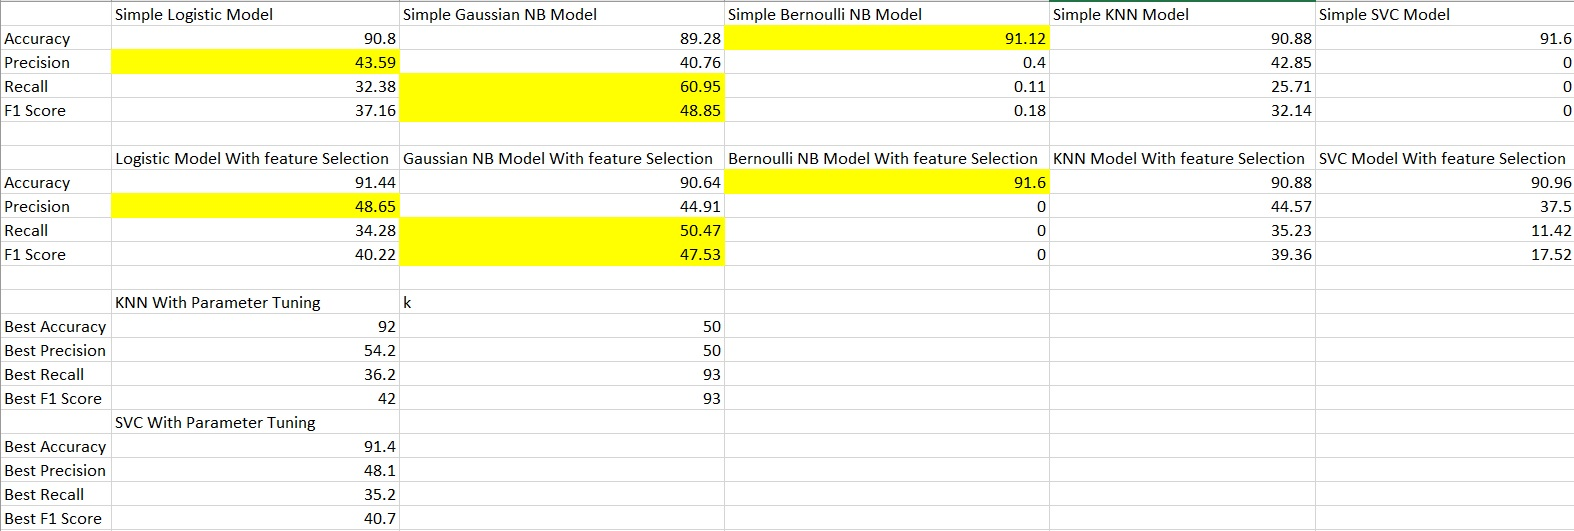

Based on this, KNN Model with nearest neighbor 50 is working well and looking at all evaluation metrices, I would chose that.